In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg, scipy.integrate
import do2
from IPython.display import display, clear_output
import time
from quantum_systems import ODQD, GeneralOrbitalSystem
from matplotlib import animation, rc
from IPython.display import HTML
%load_ext autoreload
%autoreload 2

In [2]:
### PARAMETERS ###
l = 10 # Number of eigenstates of the HO potential --> we use these functions to generate the single particle WF
grid_length = 10  # The width of the one-dimensional grid
num_grid_points = 201  # The number of discretized points on the grid.
# More points give better results for the single-particle basis at the cost of slower setup.
alpha = 1  # The strength of the Coulomb interaction 
a = 0.25  # The shielding parameter in the Coulomb interaction potential
Omega = 0.25  # The frequency of the harmonic oscillator trap
omega = 8*Omega # frequency of the laser field
epsilon0 = 1.0 # amplitude of the laser field
potential=ODQD.HOPotential(Omega)
nparticles = 2

In [25]:
ghf = do2.GHF(omega=8*Omega)
T=2*np.pi/Omega
epsilon, C0, energy_per_step, delta_per_step = ghf.solve_TIHF(1e-6, 100)
C, time, overlap, dipole, energy = ghf.solve_TDHF(0, 1e-3, 30*T, C0, eval_dipole=True, eval_overlap=True)

C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


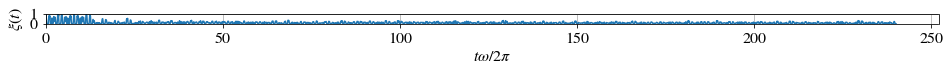

C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


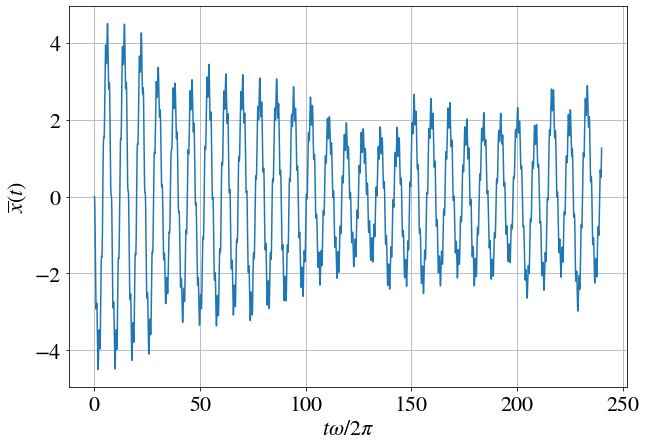

In [26]:
ghf.plot_overlap(time, overlap)
ghf.plot_dipole(time, dipole)

In [33]:
ghf = do2.GHF()
tlaser=10*np.pi
ttot=500*np.pi
C2, time1, dipole1, overlap1, xFFT1, xfreqFFT1, overlapFFT1, overlapfreqFFT1, energy = ghf.fourier_analysis(1e-6, 100, tlaser, ttot, 1e-3)

In [30]:
Omega = 0.5
omega = 3.0
ghf = do2.GHF(omega=omega, Omega=Omega)
C2, time1, dipole2, overlap2, xFFT2, xfreqFFT2, overlapFFT2, overlapfreqFFT2, energy = ghf.fourier_analysis(1e-6, 100, tlaser, ttot, 1e-4)